In [1]:
import pandas as pd
import numpy as np

import warnings
import itertools

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [4]:
test_data = pd.read_csv('test.csv')

In [5]:
test_data

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
5,1,1,2012-12-07,False
6,1,1,2012-12-14,False
7,1,1,2012-12-21,False
8,1,1,2012-12-28,True
9,1,1,2013-01-04,False


In [6]:
stores = pd.read_csv('stores.csv')

In [7]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [8]:
features = pd.read_csv('features.csv')

In [9]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [19]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [17]:
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB
None


In [18]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB
None


In [10]:
train_data_comp = pd.merge(train_data,stores,left_on='Store',right_on='Store',how='left')

In [11]:
train_data_comp

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
5,1,1,2010-03-12,21043.39,False,A,151315
6,1,1,2010-03-19,22136.64,False,A,151315
7,1,1,2010-03-26,26229.21,False,A,151315
8,1,1,2010-04-02,57258.43,False,A,151315
9,1,1,2010-04-09,42960.91,False,A,151315


In [14]:
train_data_comp = pd.merge(train_data_comp,features,left_on=['Store','Date'],right_on=['Store','Date'],how='left')

In [26]:
train_data_comp

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808


In [55]:
print(train_data_comp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Month           421570 non-null object
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(2)
memory usage: 55.1+ MB
None


In [21]:
train_data_comp.drop('IsHoliday_y',axis=1,inplace=True)

In [24]:
train_data_comp = train_data_comp.rename(columns={'IsHoliday_x':'IsHoliday'})

<Strong>Making Date as index :</Strong> 

In [46]:
dates = pd.date_range(start='2010-02-05',end='2012-10-26' ,freq='W-FRI')

In [47]:
dates

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', length=143, freq='W-FRI')

In [53]:
train_data_comp['Date'] = train_data_comp['Date'].astype('datetime64[ns]')

In [58]:
dates = pd.DatetimeIndex(train_data_comp['Date'])

In [66]:
import calendar

In [62]:
train_data_comp['Year'] = dates.year

In [67]:
train_data_comp['Month'] = dates.month
train_data_comp['Month'] = train_data_comp['Month'].apply(lambda x: calendar.month_abbr[x])

train_data_comp['Week'] = dates.week
train_data_comp['Quater'] = dates.quarter

In [76]:
train_data_comp

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Week,Quater
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Feb,2010,5,1
2010-02-12,1,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,Feb,2010,6,1
2010-02-19,1,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,Feb,2010,7,1
2010-02-26,1,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,Feb,2010,8,1
2010-03-05,1,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,Mar,2010,9,1
2010-03-12,1,1,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,Mar,2010,10,1
2010-03-19,1,1,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,Mar,2010,11,1
2010-03-26,1,1,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,Mar,2010,12,1
2010-04-02,1,1,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,Apr,2010,13,2


In [73]:
train_data_comp.set_index(dates,inplace=True)

In [75]:
train_data_comp.drop('Date',axis=1,inplace=True)

Dropping markdown variables(due to high missing values),type and size(remain same) :

In [109]:
train_data_comp.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [113]:
train_data_comp.drop(['Type','Size'],axis=1,inplace=True)

In [114]:
train_data_comp.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week,Quater
Date,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,Feb,2010,5,1
2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,Feb,2010,6,1
2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,Feb,2010,7,1
2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,Feb,2010,8,1
2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,Mar,2010,9,1


<Strong>Checking seasonality and trend :</Strong>

In [ ]:
train_data_comp[['','']].groupby([])

In [81]:
train_data_comp[(train_data_comp['Store']==1) & (train_data_comp['Dept']==1)]['Weekly_Sales']

Date
2010-02-05    24924.50
2010-02-12    46039.49
2010-02-19    41595.55
2010-02-26    19403.54
2010-03-05    21827.90
2010-03-12    21043.39
2010-03-19    22136.64
2010-03-26    26229.21
2010-04-02    57258.43
2010-04-09    42960.91
2010-04-16    17596.96
2010-04-23    16145.35
2010-04-30    16555.11
2010-05-07    17413.94
2010-05-14    18926.74
2010-05-21    14773.04
2010-05-28    15580.43
2010-06-04    17558.09
2010-06-11    16637.62
2010-06-18    16216.27
2010-06-25    16328.72
2010-07-02    16333.14
2010-07-09    17688.76
2010-07-16    17150.84
2010-07-23    15360.45
2010-07-30    15381.82
2010-08-06    17508.41
2010-08-13    15536.40
2010-08-20    15740.13
2010-08-27    15793.87
                ...   
2012-04-06    57592.12
2012-04-13    34684.21
2012-04-20    16976.19
2012-04-27    16347.60
2012-05-04    17147.44
2012-05-11    18164.20
2012-05-18    18517.79
2012-05-25    16963.55
2012-06-01    16065.49
2012-06-08    17666.00
2012-06-15    17558.82
2012-06-22    16633.41
2012-0

In [82]:
sales_ts = train_data_comp[(train_data_comp['Store']==1) & (train_data_comp['Dept']==1)]['Weekly_Sales']

Text(0,0.5,'Tractor Sales')

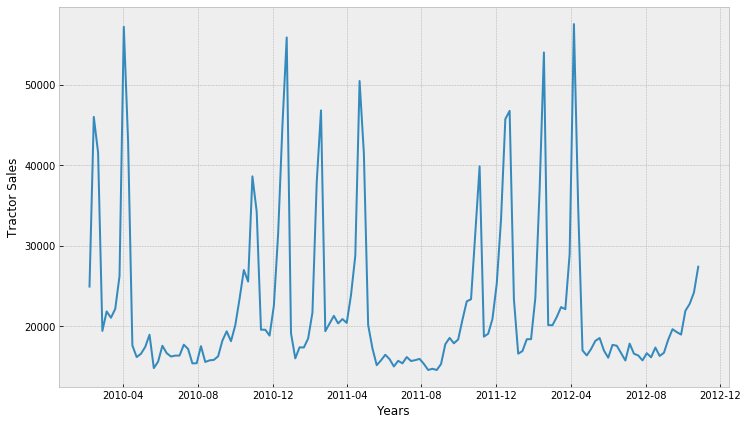

In [84]:
plt.figure(figsize=(12, 7))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

In [85]:
sales_ts = train_data_comp[(train_data_comp['Store']==1) & (train_data_comp['Dept']==45)]['Weekly_Sales']

Text(0,0.5,'Tractor Sales')

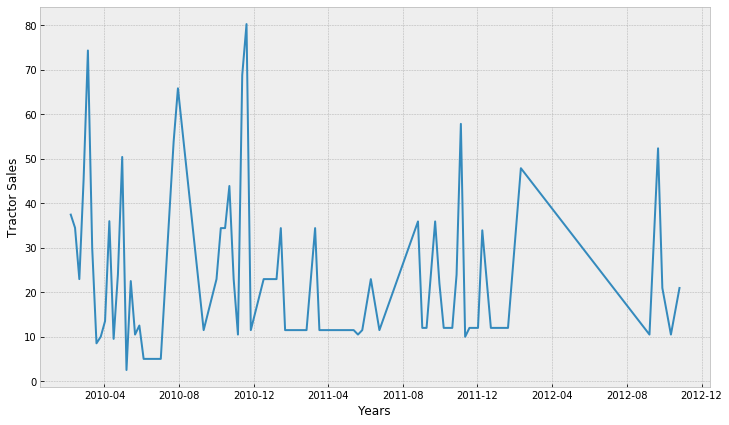

In [86]:
plt.figure(figsize=(12, 7))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

In [87]:
sales_ts = train_data_comp[(train_data_comp['Store']==34) & (train_data_comp['Dept']==45)]['Weekly_Sales']

Text(0,0.5,'Tractor Sales')

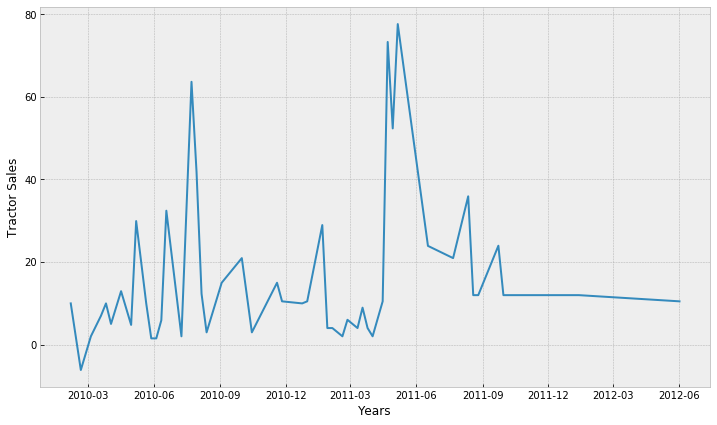

In [88]:
plt.figure(figsize=(12, 7))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

In [89]:
sales_ts = train_data_comp[(train_data_comp['Store']==34)]['Weekly_Sales']

Text(0,0.5,'Tractor Sales')

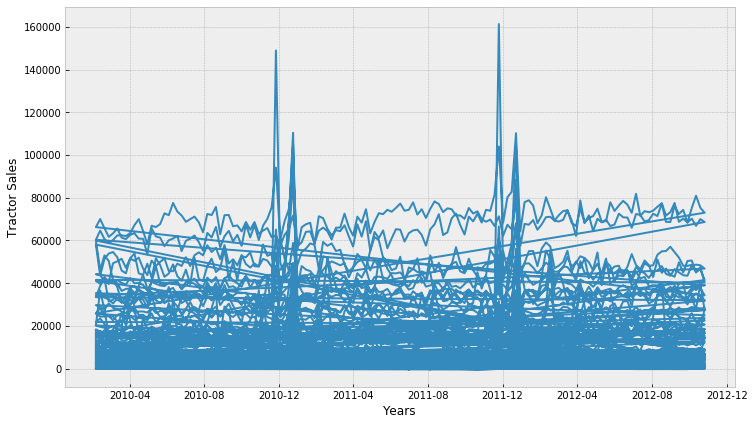

In [90]:
plt.figure(figsize=(12, 7))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

In [93]:
for i in range(10):
    sales_data = i
    print('sales_data_',i)

sales_data_ 0
sales_data_ 1
sales_data_ 2
sales_data_ 3
sales_data_ 4
sales_data_ 5
sales_data_ 6
sales_data_ 7
sales_data_ 8
sales_data_ 9


In [94]:
lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [96]:
lists[0]

[1, 2, 3]

### Applying on single data-set:

In [115]:
data_set_11 = train_data_comp[(train_data_comp['Store']==1) & (train_data_comp['Dept']==1)]

In [116]:
data_set_11.head(10)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week,Quater
Date,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,Feb,2010,5,1
2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,Feb,2010,6,1
2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,Feb,2010,7,1
2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,Feb,2010,8,1
2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,Mar,2010,9,1
2010-03-12,1,1,21043.39,False,57.79,2.667,211.380643,8.106,Mar,2010,10,1
2010-03-19,1,1,22136.64,False,54.58,2.720,211.215635,8.106,Mar,2010,11,1
2010-03-26,1,1,26229.21,False,51.45,2.732,211.018042,8.106,Mar,2010,12,1
2010-04-02,1,1,57258.43,False,62.27,2.719,210.820450,7.808,Apr,2010,13,2


In [117]:
data_set_11.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 12 columns):
Store           143 non-null int64
Dept            143 non-null int64
Weekly_Sales    143 non-null float64
IsHoliday       143 non-null bool
Temperature     143 non-null float64
Fuel_Price      143 non-null float64
CPI             143 non-null float64
Unemployment    143 non-null float64
Month           143 non-null object
Year            143 non-null int64
Week            143 non-null int64
Quater          143 non-null int64
dtypes: bool(1), float64(5), int64(5), object(1)
memory usage: 13.5+ KB


In [119]:
data_set_11.iloc[90]
data_set_11.loc['2010-02-19']

Store                 1
Dept                  1
Weekly_Sales    41595.6
IsHoliday         False
Temperature       39.93
Fuel_Price        2.514
CPI             211.289
Unemployment      8.106
Month               Feb
Year               2010
Week                  7
Quater                1
Name: 2010-02-19 00:00:00, dtype: object

In [120]:
sales_11 = data_set_11['Weekly_Sales']

In [121]:
sales_11.head()

Date
2010-02-05    24924.50
2010-02-12    46039.49
2010-02-19    41595.55
2010-02-26    19403.54
2010-03-05    21827.90
Name: Weekly_Sales, dtype: float64

Text(0,0.5,'Weekly Sales')

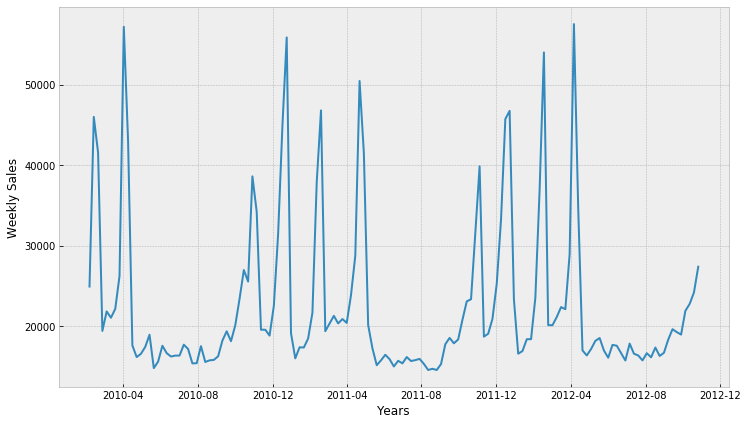

In [123]:
plt.figure(figsize=(12, 7))
plt.plot(sales_11)
plt.xlabel('Years')
plt.ylabel('Weekly Sales')

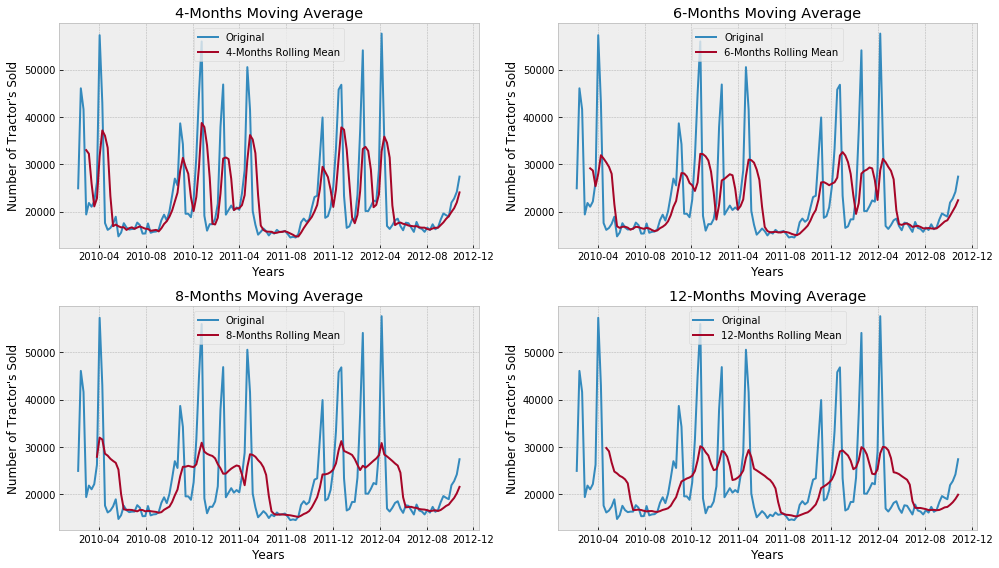

In [124]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales_11.index, sales_11, label='Original')
axes[0][0].plot(sales_11.index, sales_11.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales_11.index, sales_11, label='Original')
axes[0][1].plot(sales_11.index, sales_11.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales_11.index, sales_11, label='Original')
axes[1][0].plot(sales_11.index, sales_11.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales_11.index, sales_11, label='Original')
axes[1][1].plot(sales_11.index, sales_11.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [132]:
decomposition = sm.tsa.seasonal_decompose(sales_11, model='multiplicative', extrapolate_trend=4)

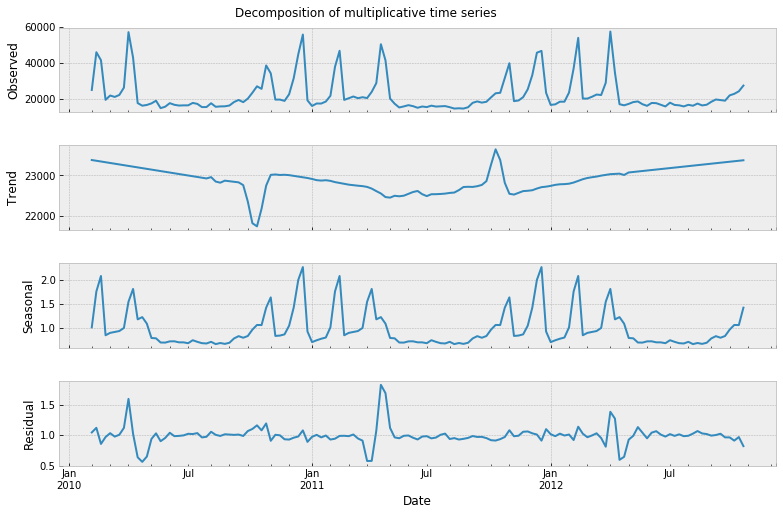

In [133]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

#### =>From the decomposition, it is clear that the data has seasonality and trend,so pattern data

Perform Dickey-Fuller test:

In [130]:
from statsmodels.tsa.stattools import adfuller

In [131]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_11)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.522164
p-value                          0.110174
#lags Used                       6.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


#### => Data is multipicative and non-stationary in nature.

## Buidling model with SARIMAX :-

In [139]:
sales_11_diff = sales_11.diff(1)
sales_11_diff.dropna(inplace=True)

In [141]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_11_diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.104431e+01
p-value                        5.269934e-20
#lags Used                     5.000000e+00
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64


In [266]:
data_set_11.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_True
Date,,,,,,,,
2010-02-05,1,1,24924.50,42.31,2.572,211.096358,8.106,0
2010-02-12,1,1,46039.49,38.51,2.548,211.242170,8.106,1
2010-02-19,1,1,41595.55,39.93,2.514,211.289143,8.106,0
2010-02-26,1,1,19403.54,46.63,2.561,211.319643,8.106,0
2010-03-05,1,1,21827.90,46.50,2.625,211.350143,8.106,0


In [146]:
col = pd.get_dummies(data_set_11['IsHoliday'],prefix='IsHoliday',drop_first=True)
data_set_11 = pd.concat([data_set_11, col], axis=1)
data_set_11.drop( 'IsHoliday', axis = 1, inplace = True )

In [148]:
data_set_11.drop(['Month','Year','Week','Quater'],axis=1,inplace=True)

In [243]:
pdq = 0
seasonal_pdq = 0

In [244]:
import itertools
import sys

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None

    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
                
                

    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    pdq = best_pdq
    seasonal_pdq = best_seasonal_pdq

In [151]:
data_set_11.corr()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_True
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,NaN,NaN,1.000000,-0.473860,-0.066396,-0.043533,0.103399,0.090061
Temperature,NaN,NaN,-0.473860,1.000000,0.228493,0.118503,-0.180695,-0.200543
Fuel_Price,NaN,NaN,-0.066396,0.228493,1.000000,0.755259,-0.513944,-0.085903
CPI,NaN,NaN,-0.043533,0.118503,0.755259,1.000000,-0.813471,-0.028919
Unemployment,NaN,NaN,0.103399,-0.180695,-0.513944,-0.813471,1.000000,0.082949
IsHoliday_True,NaN,NaN,0.090061,-0.200543,-0.085903,-0.028919,0.082949,1.000000


In [267]:
timeseries = data_set_11["Weekly_Sales"]
regressors = data_set_11[['IsHoliday_True']]
best_results = auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 2), q=range(0, 2),
                         P=range(0, 2), D=range(0, 2), Q=range(0, 2))

Best SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 model - AIC:2475.7443386242057
                                 Statespace Model Results                                 
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1232.872
Date:                            Tue, 27 Aug 2019   AIC                           2475.744
Time:                                    20:28:10   BIC                           2489.512
Sample:                                02-05-2010   HQIC                          2481.333
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
IsHoliday_True     1.5877   4234.722 

In [248]:
seasonal_pdq

0

<strong>Building model with :- </strong>
<br><pre>    p,d,q,D and Q as 1
    P = 0
    seasonality = 12

In [268]:
best_model = sm.tsa.statespace.SARIMAX(timeseries,
                                      exog = regressors,
                                      order=(1, 1 ,1),
                                      seasonal_order=(0, 1, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [269]:
best_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1232.872
Date:                            Tue, 27 Aug 2019   AIC                           2475.744
Time:                                    20:28:42   BIC                           2489.512
Sample:                                02-05-2010   HQIC                          2481.333
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
IsHoliday_True     1.5877   4234.722      0.000      1.000   -8298.314    8301.489
ar.L1              0.5909      0.220      2.682      0.007       0.159       1.023
ma.L1             -0.9797      0.125     -7.862      0.000      -1.224      -0.735
ma.S.L12          -0.8927      0.163     -5.485      0.000      -1.212      -0.574
sigma2          1.748e+08      0.093   1.88e+09      0.000    1.75e+08    1.75e+08
===================================================================================
Ljung-Box (Q):                       58.47   Jarque-Bera (JB):                39.35
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.82
Prob(H) (two-sided):                  0.35   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.19e+25. Standard errors may be unstable.
"""

#### Predicting the values for evaluation of the model :-

In [270]:
data_set_11.tail(50)

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_True
Date,,,,,,,,
2011-11-18,1,1,19050.66,62.25,3.308,218.220509,7.866,0
2011-11-25,1,1,20911.25,60.14,3.236,218.467621,7.866,1
2011-12-02,1,1,25293.49,48.91,3.172,218.714733,7.866,0
2011-12-09,1,1,33305.92,43.93,3.158,218.961846,7.866,0
2011-12-16,1,1,45773.03,51.63,3.159,219.179453,7.866,0
2011-12-23,1,1,46788.75,47.96,3.112,219.357722,7.866,0
2011-12-30,1,1,23350.88,44.55,3.129,219.535990,7.866,1
2012-01-06,1,1,16567.69,49.01,3.157,219.714258,7.348,0
2012-01-13,1,1,16894.40,48.53,3.261,219.892526,7.348,0


In [237]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2011-11-18'), full_results=True)

In [238]:
pred_dynamic.predicted_mean

2011-11-18    19121.771254
2011-11-25    18322.857790
2011-12-02    16753.332850
2011-12-09    28076.045139
2011-12-16    31052.465553
2011-12-23    39257.803554
2011-12-30    39336.491211
2012-01-06    23263.043152
2012-01-13    18923.973851
2012-01-20    20302.302672
2012-01-27    19159.021831
2012-02-03    19473.999502
2012-02-10    22541.267669
2012-02-17    30253.980396
2012-02-24    39014.360459
2012-03-02    26467.738091
2012-03-09    25365.940779
2012-03-16    25432.391172
2012-03-23    22763.512414
2012-03-30    21854.007419
2012-04-06    26487.928613
2012-04-13    45601.382973
2012-04-20    29911.904279
2012-04-27    19925.505153
2012-05-04    20502.090821
2012-05-11    21227.643581
2012-05-18    15107.476202
2012-05-25    24818.563034
2012-06-01    22987.781106
2012-06-08    21963.782618
2012-06-15    19744.996635
2012-06-22    19725.699720
2012-06-29    22079.647555
2012-07-06    18178.088141
2012-07-13    17321.943540
2012-07-20    18381.230028
2012-07-27    19255.720344
2

In [172]:
forecast = pred_dynamic.predicted_mean
actual = data_set_11['2011-11-18':]['Weekly_Sales']

In [173]:
actual

Date
2011-11-18    19050.66
2011-11-25    20911.25
2011-12-02    25293.49
2011-12-09    33305.92
2011-12-16    45773.03
2011-12-23    46788.75
2011-12-30    23350.88
2012-01-06    16567.69
2012-01-13    16894.40
2012-01-20    18365.10
2012-01-27    18378.16
2012-02-03    23510.49
2012-02-10    36988.49
2012-02-17    54060.10
2012-02-24    20124.22
2012-03-02    20113.03
2012-03-09    21140.07
2012-03-16    22366.88
2012-03-23    22107.70
2012-03-30    28952.86
2012-04-06    57592.12
2012-04-13    34684.21
2012-04-20    16976.19
2012-04-27    16347.60
2012-05-04    17147.44
2012-05-11    18164.20
2012-05-18    18517.79
2012-05-25    16963.55
2012-06-01    16065.49
2012-06-08    17666.00
2012-06-15    17558.82
2012-06-22    16633.41
2012-06-29    15722.82
2012-07-06    17823.37
2012-07-13    16566.18
2012-07-20    16348.06
2012-07-27    15731.18
2012-08-03    16628.31
2012-08-10    16119.92
2012-08-17    17330.70
2012-08-24    16286.40
2012-08-31    16680.24
2012-09-07    18322.37
2012-0

#### Evaluating the model :-

In [174]:
MAPE = np.mean(np.abs(actual - forecast)/actual)

In [175]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.2372


In [176]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 71708553.2031
The ROOT Mean Squared Error of our forecasts is 8468.09029256892


#### Forecasting values :-

In [181]:
test_11 = test_data[(test_data['Store']==1) & (test_data['Dept']==1)]


In [194]:
test_11

,IsHoliday_True
Date,
2012-11-02,0
2012-11-09,0
2012-11-16,0
2012-11-23,1
2012-11-30,0
2012-12-07,0
2012-12-14,0
2012-12-21,0
2012-12-28,1


In [183]:
test_11.set_index('Date',inplace=True)

In [191]:
test_11.drop(['Store', 'Dept'],axis=1,inplace=True)

In [189]:
test_11.columns

Index(['Store', 'Dept', 'IsHoliday'], dtype='object')

In [193]:
col = pd.get_dummies(test_11['IsHoliday'],prefix='IsHoliday',drop_first=True)
test_11 = pd.concat([test_11, col], axis=1)
test_11.drop( 'IsHoliday', axis = 1, inplace = True )

In [230]:
# forecasting for the next 39 values
best_results.forecast(steps=39, exog=test_11)

2012-11-02    20206.337841
2012-11-09    23422.671824
2012-11-16    24581.024138
2012-11-23    25351.596237
2012-11-30    23435.239382
2012-12-07    22340.402248
2012-12-14    23915.335073
2012-12-21    22555.245913
2012-12-28    20188.971650
2013-01-04    20193.204083
2013-01-11    21089.576434
2013-01-18    22283.617488
2013-01-25    17170.247084
2013-02-01    21610.462719
2013-02-08    23493.634394
2013-02-15    24688.412213
2013-02-22    23026.196587
2013-03-01    22080.601560
2013-03-08    23743.726419
2013-03-15    22435.752812
2013-03-22    20098.687598
2013-03-29    20122.706587
2013-04-05    21029.833218
2013-04-12    22230.229327
2013-04-19    17120.614332
2013-04-26    21563.049160
2013-05-03    23445.944498
2013-05-10    24643.084995
2013-05-17    22981.327309
2013-05-24    22036.002894
2013-05-31    23699.287667
2013-06-07    22391.408558
2013-06-14    20054.399186
2013-06-21    20078.451174
2013-06-28    20985.597305
2013-07-05    22186.004937
2013-07-12    17076.396752
2

In [198]:
# Get confidence intervals 95% & 99% of the forecasts

n_steps = 39
pred_uc_99 = best_results.get_forecast(steps=39, alpha=0.01, exog=test_11) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=39, alpha=0.05, exog=test_11) # alpha=0.05 95% CI


pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [200]:
n_steps = 39
idx = pd.date_range(start='2012-11-02',end='2013-07-26' ,freq='W-FRI')
fc_95 = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean, pred_ci_95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])

fc_99 = pd.DataFrame(np.column_stack([pred_ci_99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2012-11-02,20206.337841,-5789.425508,46202.101190,-5789.425508,46202.101190
2012-11-09,23422.671824,-7126.458678,53971.802326,-7126.458678,53971.802326
2012-11-16,24581.024138,-7612.569413,56774.617688,-7612.569413,56774.617688
2012-11-23,25351.596237,-7522.780217,58225.972691,-7522.780217,58225.972691
2012-11-30,23435.239382,-9752.662942,56623.141706,-9752.662942,56623.141706
2012-12-07,22340.402248,-11009.211845,55690.016341,-11009.211845,55690.016341
2012-12-14,23915.335073,-9529.084603,57359.754748,-9529.084603,57359.754748
2012-12-21,22555.245913,-10953.154795,56063.646621,-10953.154795,56063.646621
2012-12-28,20188.971650,-13369.116994,53747.060294,-13369.116994,53747.060294
2013-01-04,20193.204083,-13408.444456,53794.852622,-13408.444456,53794.852622


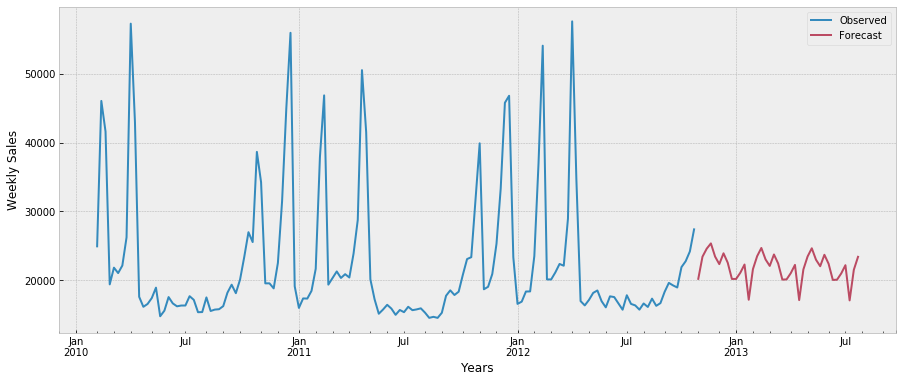

In [202]:
# plot the forecast along with the confidence band
axis = data_set_11['Weekly_Sales'].plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Weekly Sales')
plt.legend(loc='best')
plt.show()

#### Assumpation Checks :-

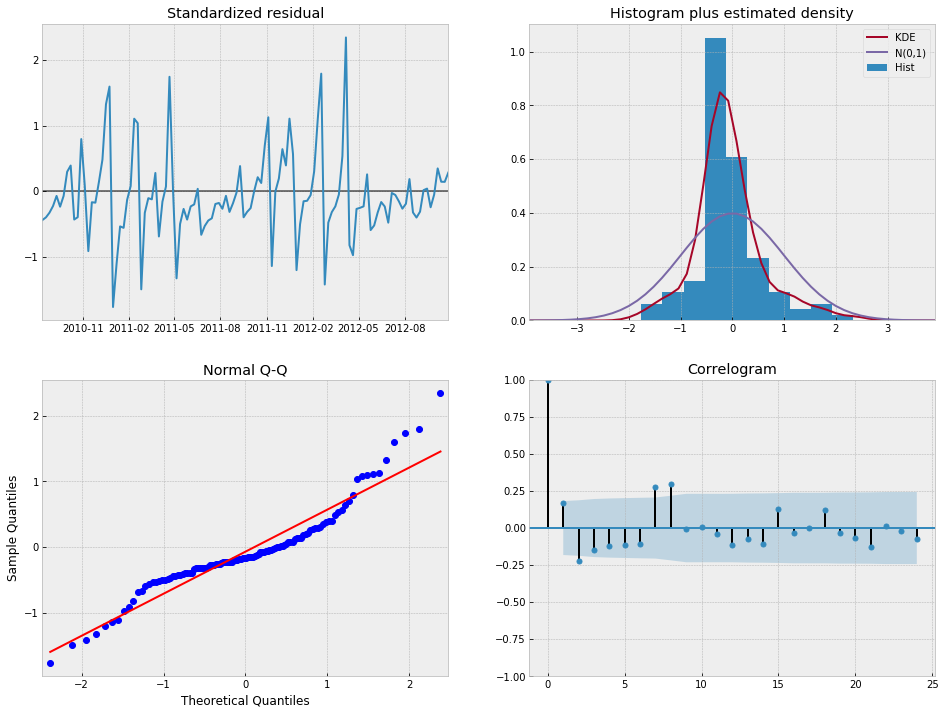

In [203]:
best_results.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()

### Automating for the rest of the data :-

In [206]:
train_data_comp

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week,Quater
Date,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,Feb,2010,5,1
2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,Feb,2010,6,1
2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,Feb,2010,7,1
2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,Feb,2010,8,1
2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,Mar,2010,9,1
2010-03-12,1,1,21043.39,False,57.79,2.667,211.380643,8.106,Mar,2010,10,1
2010-03-19,1,1,22136.64,False,54.58,2.720,211.215635,8.106,Mar,2010,11,1
2010-03-26,1,1,26229.21,False,51.45,2.732,211.018042,8.106,Mar,2010,12,1
2010-04-02,1,1,57258.43,False,62.27,2.719,210.820450,7.808,Apr,2010,13,2


In [222]:
size_arr = []
for i in range(1,46):
    size = train_data_comp[(train_data_comp['Store']==i)]['Dept'].max()
    size_arr.append(size)

In [224]:
len(size_arr)

45

In [221]:
train_data_comp[(train_data_comp['Store']==5)]['Dept'].max()

98

In [228]:
size_arr[44]

98

In [271]:
regressors

,IsHoliday_True
Date,
2010-02-05,0
2010-02-12,1
2010-02-19,0
2010-02-26,0
2010-03-05,0
2010-03-12,0
2010-03-19,0
2010-03-26,0
2010-04-02,0


In [254]:
train_data_comp.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week,Quater,IsHoliday_True
Date,,,,,,,,,,,,
2010-02-05,1,1,24924.50,42.31,2.572,211.096358,8.106,Feb,2010,5,1,0
2010-02-12,1,1,46039.49,38.51,2.548,211.242170,8.106,Feb,2010,6,1,1
2010-02-19,1,1,41595.55,39.93,2.514,211.289143,8.106,Feb,2010,7,1,0
2010-02-26,1,1,19403.54,46.63,2.561,211.319643,8.106,Feb,2010,8,1,0
2010-03-05,1,1,21827.90,46.50,2.625,211.350143,8.106,Mar,2010,9,1,0


In [253]:
col = pd.get_dummies(train_data_comp['IsHoliday'],prefix='IsHoliday',drop_first=True)
train_data_comp = pd.concat([train_data_comp, col], axis=1)
train_data_comp.drop( 'IsHoliday', axis = 1, inplace = True )

In [263]:
train_data_comp[(train_data_comp['Store']==2) & (train_data_comp['Dept']==3)]

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week,Quater,IsHoliday_True
Date,,,,,,,,,,,,
2010-02-05,2,3,16873.20,40.19,2.572,210.752605,8.324,Feb,2010,5,1,0
2010-02-12,2,3,13821.01,38.49,2.548,210.897994,8.324,Feb,2010,6,1,1
2010-02-19,2,3,14607.28,39.69,2.514,210.945160,8.324,Feb,2010,7,1,0
2010-02-26,2,3,15635.95,46.10,2.561,210.975957,8.324,Feb,2010,8,1,0
2010-03-05,2,3,14895.96,47.17,2.625,211.006754,8.324,Mar,2010,9,1,0
2010-03-12,2,3,13061.56,57.56,2.667,211.037551,8.324,Mar,2010,10,1,0
2010-03-19,2,3,10394.28,54.52,2.720,210.873332,8.324,Mar,2010,11,1,0
2010-03-26,2,3,12406.44,51.26,2.732,210.676610,8.324,Mar,2010,12,1,0
2010-04-02,2,3,13404.23,63.27,2.719,210.479887,8.200,Apr,2010,13,2,0


In [349]:
mape_arr = []
rmse_arr = []
fore_arr = []

for i in range(1,46):
    cap = size_arr[i-1]
    cap = cap+1
    for j in range(1,cap):
        data_set = train_data_comp[(train_data_comp['Store']==i) & (train_data_comp['Dept']==j)]
        
        timeseries = data_set["Weekly_Sales"]
        
        try:
            best_model = sm.tsa.statespace.SARIMAX(timeseries,
                                      exog = regressors,
                                      order=(1, 1 ,1),
                                      seasonal_order=(0, 1, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
            best_results = best_model.fit()
        
        except:
            continue
            
        #Prediction
        pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2011-11-18'), full_results=True)
        forecast = pred_dynamic.predicted_mean
        actual = data_set['2011-11-18':]['Weekly_Sales']
        
        #Error
        MAPE = np.mean(np.abs(actual - forecast)/actual)
        mse = ((actual - forecast) ** 2).mean()
        rmse = np.sqrt(mse)
        mape_arr.append(MAPE)
        rmse_arr.append(rmse)
        #Forecasting
        ans = best_results.forecast(steps=39, exog=test_11)
        fore_arr.append(ans)

In [350]:
len(fore_arr)

2660

In [279]:
# list of list
type(fore_arr)

list

### Exporting to the file :-

In [338]:
xx = pd.Series(fore_arr)

In [339]:
xx.head()

0    2012-11-02    20206.337841
2012-11-09    23422...
1    2012-11-02    43525.945220
2012-11-09    45261...
2    2012-11-02     9207.030959
2012-11-09    11958...
3    2012-11-02    36369.506501
2012-11-09    37916...
4    2012-11-02    18283.124211
2012-11-09    21223...
dtype: object

In [353]:
xx[1098]

2012-11-02    15322.148067
2012-11-09    15802.321968
2012-11-16    17817.630935
2012-11-23    17550.395820
2012-11-30    16007.357998
2012-12-07    15821.656545
2012-12-14    15517.541299
2012-12-21    15969.972277
2012-12-28    16587.835922
2013-01-04    15851.395368
2013-01-11    15862.497550
2013-01-18    15695.409561
2013-01-25    14722.302222
2013-02-01    15507.012322
2013-02-08    17666.878496
2013-02-15    17470.970805
2013-02-22    15960.211373
2013-03-01    15790.367396
2013-03-08    15493.827155
2013-03-15    15949.876658
2013-03-22    16570.386424
2013-03-29    15833.854007
2013-04-05    15845.350627
2013-04-12    15678.451057
2013-04-19    14705.433726
2013-04-26    15490.186821
2013-05-03    17650.991110
2013-05-10    17454.175653
2013-05-17    15943.420908
2013-05-24    15773.579170
2013-05-31    15477.039999
2013-06-07    15933.090013
2013-06-14    16553.600023
2013-06-21    15817.067722
2013-06-28    15828.564398
2013-07-05    15661.664855
2013-07-12    14688.647536
2

In [347]:
for i in range(2660):
    with open('output.csv', 'a') as f:
        xx[i].to_csv(f, mode='a', header=f.tell()==0)

In [322]:
sum(mape_arr)

inf

In [324]:
from statistics import mean
mean(mape_arr)

inf

In [313]:
# avgerage rmse value
sum(rmse_arr)/len(rmse_arr)

3734.231010886482